In [46]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [47]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
class_names = ['airplane','automobile','cat', 'dog', 'bird', 'deer', 'frog', 'horse','ship','truck']

In [48]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [49]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3785 - accuracy: 0.5053
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0241 - accuracy: 0.6401
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8737 - accuracy: 0.6952
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7633 - accuracy: 0.7367
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6650 - accuracy: 0.7690
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.5773 - accuracy: 0.8000
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.4910 - accuracy: 0.8264
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.4096 - accuracy: 0.8577
Epoch 9/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.3351 - accuracy: 0.8807
Epoch 10/10
1563/1563 [==============================] - 30s 19m

In [52]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 1.1649 - accuracy: 0.6992 - 2s/epoch - 6ms/step

Test accuracy: 0.6991999745368958


In [53]:
image_classes_prediction=np.argmax(model.predict(test_images), axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=test_labels, predictions=image_classes_prediction).numpy()
confusion_matrix_norm = np.around(confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis], decimals=2)
confusion_matrix_df = pd.DataFrame(confusion_matrix_norm,index = class_names,columns = class_names)

313/313 [==============================] - 2s 5ms/step


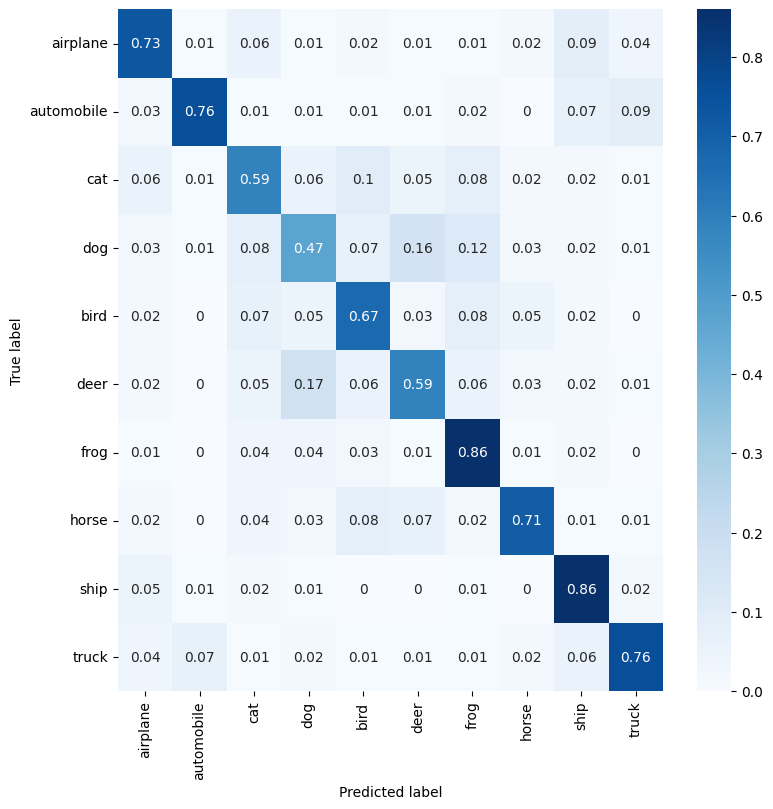

In [54]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()